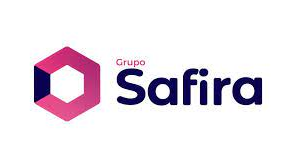

# CONTEXTO DO PROBLEMA

O **Grupo Safira** é um conglomerado que atua no Mercado de Livre de Energia há mais de 13 anos.﻿

O propósito é democratizar o acesso das pessoas ao setor de energia de forma digital. Para isso a empresa investe e desenvolve soluções inovadoras e tecnológicas, que oferecem praticidade e economia aos clientes, sejam pessoas físicas ou jurídicas.

Garatindo a experiência qualificada em todas as frentes relacionadas a geração, gestão, inteligência de mercado, comercialização e consultoria em energia elétrica.

**O que é o Mercado livre de energia?**

O mercado livre de energia é um lugar em que os consumidores livres compram energia diretamente dos geradores ou comercializadores, através de contratos bilaterais com condições livremente negociadas, como preço, prazo, volume, etc. Cada unidade consumidora paga uma fatura referente ao serviço de distribuição para a concessionária local (tarifa regulada) e uma ou mais faturas referentes à compra da energia (preço negociado de contrato).


A Safira, possui uma área de risco, que é reponsável por mensurar os riscos financeiros que a empresa está exposta.
Os riscos podem ser dividos em:
    
1. Risco de mecado - Está relacionado com as oscilações do preço no mercado.
2. Risco de Liquidez - É definido pela possibilidade de perda de capital pela incapacidade de liquidar determinada posição.
3. Risco de crédito - Ocorre quando alguma contraparte não honra os compromissos assumidos no contrato.
4. Risco operacional - Corresponde a possibilidade de perdas geradas por falhas nos processos.

# PROBLEMA

Você foi selecionado para ajudar uma industria cervejeira a calcular a volatidade do seu ativo em questão - Ações da bolsa.

Estruture os itens solicitados de forma organizada. Para auxiliá-lo(a), há um conjunto de dados que tem os preços diários de alta, baixa, abertura e fechamento do ativo.

Por fim, apresente em um vídeo de até 5 minutos, os seguintes pontos:

1. Depois de ter feito o case de Risco e descoberto alguns pontos fundamentais da área, comente quais foram os que mais despertaram o seu interesse e curiosidade? Apresente também a sua percepção acerca da área de risco.


2. Quais foram as ferramentas utlizadas para estruturar o seu case e por quê da escolha delas?


3. Em sua opinião, quais as facilidades e as dificuldades encontradas ao longo do caminho?

# PLANEJAMENTO DE COMO RESOLVER

1. **Descrição de dados** 
    - Entender os dados disponiveis.


2. **Estatistica descritiva**
    - Entender se há inconsistencias nos dados e analisar estatisticas de primeira ordem.


3. **Feature Engineering**
    - Criar features a partir das variaveis já existentes e criar hipóteses sobre os dados.


4. **Análise exploratória** 
    - Realizar análise univariada, bivariada e multivariada para encontrar insights.


5. **Requisitos do case**    
    - Construir os graficos e requisitos do case.

# 0.0 IMPORTS

In [203]:
# manipulation
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# color style
palette = ['#5e9fa3', '#dcd1b4', '#fab87f', '#f87e7b', '#b05574']

## 0.1 Carregamento de Dados

In [4]:
# lendo os dados
data = pd.read_excel('../Data/DinamicaRisco.xlsx')

# mostrando as 5 primeiras linhas dos dados
data.head()

,Date,Alta,Baixa,Abertura,Fechamento
0,2012-06-01,4925.000000,4831.750000,4910.850098,4841.600098
1,2012-06-04,4858.299805,4770.350098,4797.299805,4848.149902
2,2012-06-05,4898.950195,4847.700195,4869.450195,4863.299805
3,2012-06-06,5010.450195,4886.149902,4886.649902,4997.100098
4,2012-06-07,5059.649902,5007.750000,5035.350098,5049.649902


# 1.0 DESCRIÇÃO DE DADOS

## 1.1 Dimensão de Dados

In [13]:
rows    = data.shape[0]    # quntidade de linhas 
columns = data.shape[1] # quantidade de colunas

# mostrando quantidade de linhas e colunas
print('Qtd. de Linhas:', rows)
print('Qtd. de Colunas', columns)

Qtd. de Linhas: 975
Qtd. de Colunas 5


## 1.2 Renomeação de colunas

In [11]:
# função para deixar strings em minusculas
lower_transform = lambda x: x.lower()

# aplicando função para deixar nome das colunas como minusculas
old_columns = data.columns 
new_columns = list(map(lower_transform, old_columns))

# atribuindo os novos nomes de colunas para os dados
data.columns = new_columns
data.columns # mostrando nome das colunas atuais

Index(['date', 'alta', 'baixa', 'abertura', 'fechamento'], dtype='object')

## 1.3 Tipo de Dados

In [14]:
# verificando se os tipos de dados estão corretos
data.dtypes

date          datetime64[ns]
alta                 float64
baixa                float64
abertura             float64
fechamento           float64
dtype: object

**NOTA:** As variaveis estão com os tipos corretos.

## 1.4 Valores Nulos

In [15]:
# verificando se há dados nulos
data.isna().sum()

date          0
alta          0
baixa         0
abertura      0
fechamento    0
dtype: int64

**NOTA:** Não há valores nulos/ausentes no conjunto de dados.

# 2.0 ESTATISTICA DESCRITIVA

## 2.1 Variaveis Numéricas

In [18]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
alta,975.0,7018.906468,1161.649405,4858.299805,5933.600098,7226.850098,8057.425049,9119.200195
baixa,975.0,6935.482666,1151.240215,4770.350098,5870.399902,7090.700195,7954.100098,8925.549805
abertura,975.0,6982.006773,1159.061485,4797.299805,5906.074951,7201.250000,8012.024902,9109.150391
fechamento,975.0,6977.908873,1155.100235,4841.600098,5905.350098,7191.750000,8002.175049,8996.250000


**INSIGHT:** O ativo da industria cervejeira obteve no fechamento como menor valor 4841.60 pontos. No maior fechamento, obeteve 8996.25. E em média, o ativo abre com 6982.00 pontos e fecha com 6977.90.

## 2.2 Variaveis de Data

In [24]:
start = data['date'].min()
end   = data['date'].max()

date_desciption = pd.DataFrame({'start_date': start, 'end_date': end}, index=[0])

,start_date,end_date
0,2012-06-01,2016-06-02


**INSIGHT:** A industria cervejeira possui o ativo desde 2012. O inicio dos registros são de 2012 e o ulitmo é de 2016.

# 3.0 FEATURE ENGINEERING

## 3.1 Hipóteses

**H1.** No ano de 2012, o ativo obteve maior valor de fechamento no mês de Julho.

**H2.** No ano de 2013, o ativo obteve maior valor de fechamento no mês de Dezembro.

**H3.** No ano de 2014, o ativo obteve maior valor de fechamento no mês de Outubro.

**H4.** No ano de 2015, o ativo obteve maior valor de fechamento no mês de março.

**H5.** No ano de 2016, o ativo obteve maior valor de fechamento no mês de janeiro.

**H6.** O ano em que o ativo fechou com maiores altas, foi no ano de 2015.

## 3.2 Feature Engineering

In [35]:
# extraindo variavel de ano
data['year'] = data['date'].dt.year

# extraindo variavel de mês
data['month'] = data['date'].dt.month

# extraindo variavel de dia
data['day'] = data['date'].dt.day

# 4.0 Análise Exploratória de Dados

## 4.1 Análise Univariada

### 4.1.1 Variaveis Numéricas

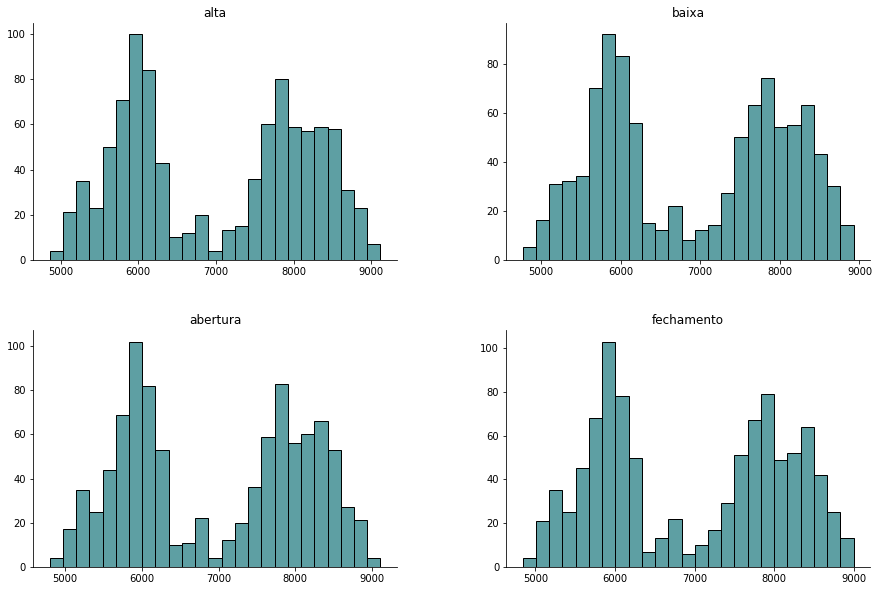

In [204]:
# filtrando variaveis numericas
numerical = data[['alta', 'baixa', 'abertura', 'fechamento']] 

# plotando grafico
numerical.hist(figsize=(15, 10), grid=False, ec='k', bins=25, color=palette[0])
sns.despine(right=True);

**INSIGHT:** A distribuição dos dados das variavies de alta, baixa, fechamento e abertura possuem distribuições muito parecidas e com os mesmos ranges variando de 5.000 a 9.000.

### 4.1.2 Outliers

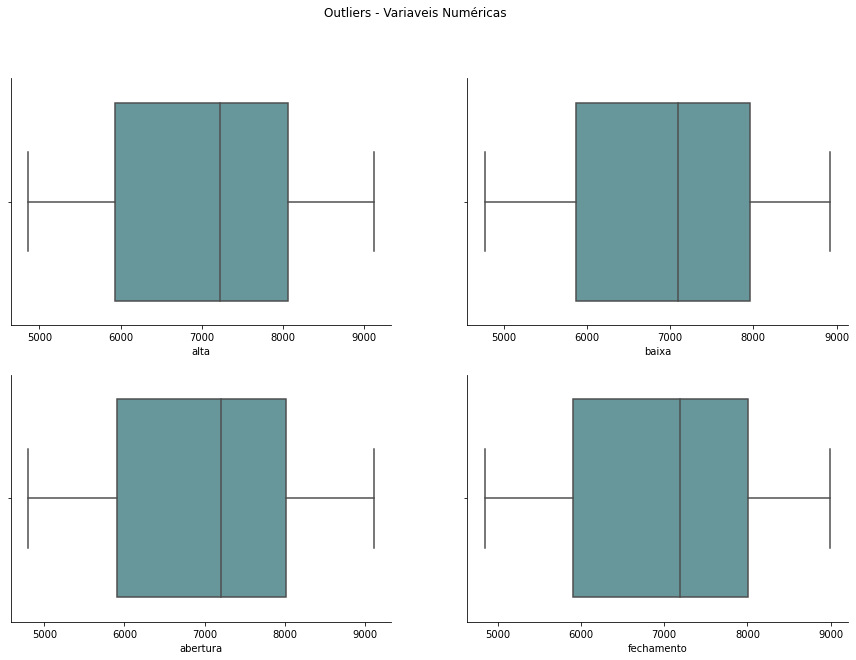

In [254]:
# grafico 1
plt.figure(figsize=(15, 10))
plt.suptitle('Outliers - Variaveis Numéricas')
plt.subplot(2, 2, 1)
sns.boxplot(x='alta', data=numerical, color=palette[0])
sns.despine(right=True)

# grafico 2
plt.subplot(2, 2, 2)
sns.boxplot(x='baixa', data=numerical, color=palette[0])
sns.despine(right=True)

# grafico 3
plt.subplot(2, 2, 3)
sns.boxplot(x='abertura', data=numerical, color=palette[0])
sns.despine(right=True)

# grafico 4
plt.subplot(2, 2, 4)
sns.boxplot(x='fechamento', data=numerical, color=palette[0])
sns.despine(right=True);

**INSIGHT:** Não há valores extremos (outliers) nos dados e as medianas/quartis estão bem parecidos e próximos. 

### 4.1.3 Variaveis de Data

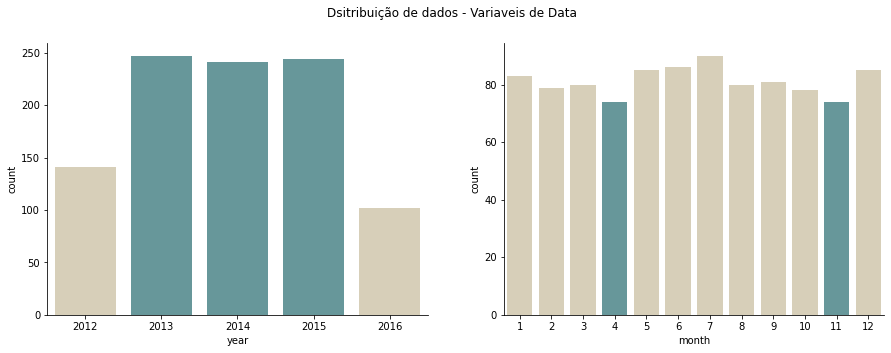

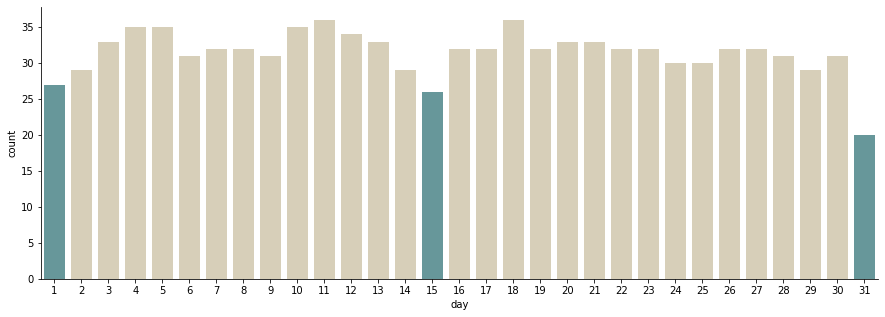

In [256]:
# filtrando variavies de data
date = data[['year', 'month', 'day']]

# grafico 1
plt.figure(figsize=(15, 5))
plt.suptitle('Dsitribuição de dados - Variaveis de Data')
plt.subplot(1, 2, 1)
sns.countplot(x='year', data=date, palette=[palette[1], palette[0], palette[0], palette[0], palette[1]])
sns.despine(right=True)

# grafico 2
plt.subplot(1, 2, 2)
color, cont = [], 0
# personalizando cores das barras
for month in range(0, 13): 
    cont+=1 
    if cont in [4, 11]:
        color.append(palette[0])
    else: 
        color.append(palette[1])
    
sns.countplot(x='month', data=date, palette=color)
sns.despine(right=True)

# grafico 3
color, cont = [], 0
# personalizando cores das barras
for month in range(0, 32): 
    cont+=1 
    if cont in [1, 15, 31]:
        color.append(palette[0])
    else: 
        color.append(palette[1])
        
plt.figure(figsize=(15, 5))
sns.countplot(x='day', data=date, palette=color)
sns.despine(right=True);

**INSIGHT:** Há mais registros do ativo nos anos de 2013, 2014 e 2015. Há menor quantidade de registros nos meses de Abril e Novembro. E há menos registros nos dias 1, 15, e 31.

## 4.2 Análise Bivariada

### H1. No ano de 2012, o ativo obteve maior valor de fechamento no mês de Julho.

**FALSA** No ano de 2012, o ativo obteve maior valor de fechamento no mês de **dezembro**.

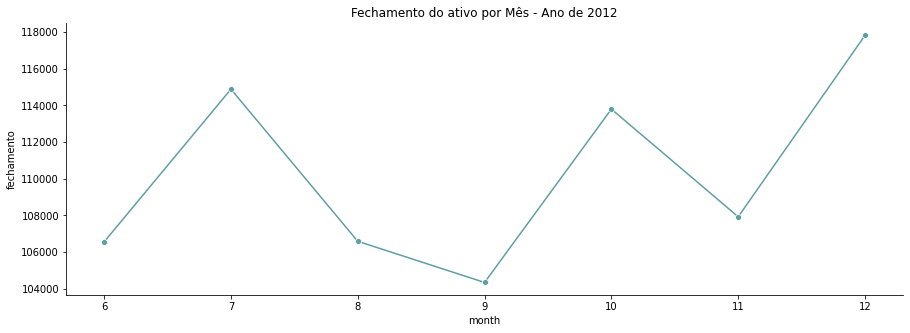

In [247]:
year_2012 = data[data['year'] == 2012] # filtrando dados com o ano de 2012
aux1 = year_2012[['fechamento', 'month']].groupby('month').sum().reset_index() # agrupando dados de 2012 por mês

# plotando grafico
plt.figure(figsize=(15, 5))
sns.lineplot(x='month', y='fechamento', data=aux1, marker='o', color=palette[0])
plt.title('Fechamento do ativo por Mês - Ano de 2012')
sns.despine(right=True);

### H2. No ano de 2013, o ativo obteve maior valor de fechamento no mês de Dezembro.

**FALSA** No ano de 2013, o ativo obteve maior valor de fechamento no mês de **Julho**.

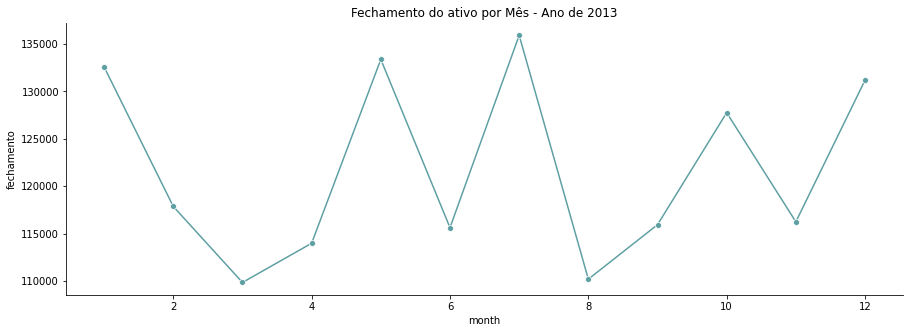

In [242]:
year_2013 = data[data['year'] == 2013] # filtrando dados com o ano de 2013
aux2 = year_2013[['fechamento', 'month']].groupby('month').sum().reset_index() # agrupando dados de 2013 por mês

# plotando grafico
plt.figure(figsize=(15, 5))
sns.lineplot(x='month', y='fechamento', data=aux2, marker='o', color=palette[0])
plt.title('Fechamento do ativo por Mês - Ano de 2013')
sns.despine(right=True);

### H3. No ano de 2014, o ativo obteve maior valor de fechamento no mês de Outubro.

**FALSA** No ano de 2014, o ativo obteve maior valor de fechamento no mês de **Dezembro**.

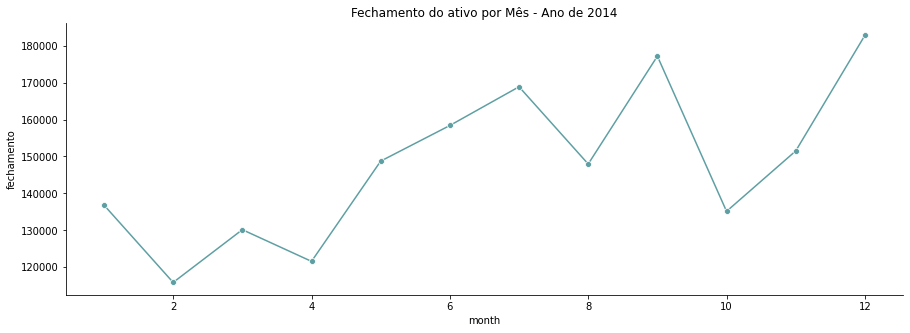

In [243]:
year_2014 = data[data['year'] == 2014] # filtrando dados com o ano de 2014
aux3 = year_2014[['fechamento', 'month']].groupby('month').sum().reset_index() # agrupando dados de 2014 por mês

# plotando grafico
plt.figure(figsize=(15, 5))
sns.lineplot(x='month', y='fechamento', data=aux3, marker='o', color=palette[0])
plt.title('Fechamento do ativo por Mês - Ano de 2014')
sns.despine(right=True);

### H4. No ano de 2015, o ativo obteve maior valor de fechamento no mês de março.

**FALSA** No ano de 2015, o ativo obteve maior valor de fechamento no mês de **Julho**.

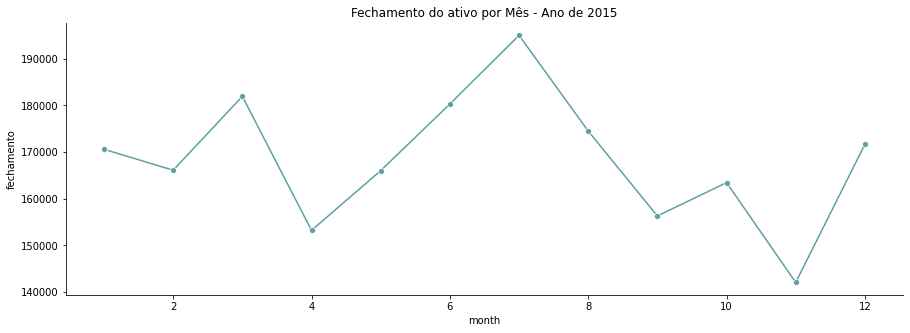

In [244]:
year_2015 = data[data['year'] == 2015] # filtrando dados com o ano de 2015
aux4 = year_2015[['fechamento', 'month']].groupby('month').sum().reset_index() # agrupando dados de 2015 por mês

# plotando grafico
plt.figure(figsize=(15, 5))
sns.lineplot(x='month', y='fechamento', data=aux4, marker='o', color=palette[0])
plt.title('Fechamento do ativo por Mês - Ano de 2015')
sns.despine(right=True);

### H5. No ano de 2016, o ativo obteve maior valor de fechamento no mês de janeiro.

**FALSA** No ano de 2016, o ativo obteve maior valor de fechamento no mês de **Maio**.

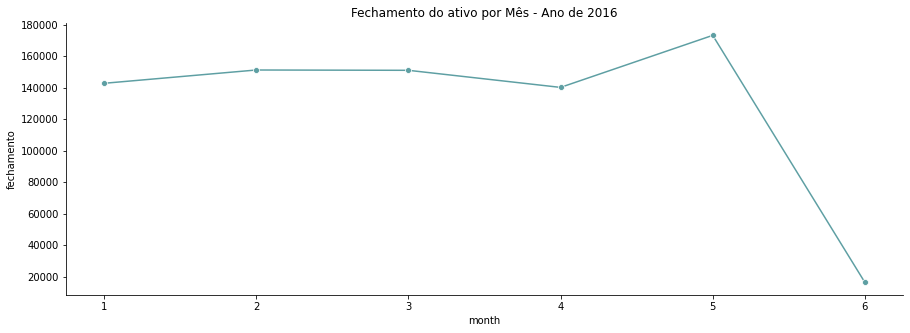

In [245]:
year_2016 = data[data['year'] == 2016] # filtrando dados com o ano de 2016
aux5 = year_2016[['fechamento', 'month']].groupby('month').sum().reset_index() # agrupando dados de 2016 por mês

# plotando grafico
plt.figure(figsize=(15, 5))
sns.lineplot(x='month', y='fechamento', data=aux5, marker='o', color=palette[0])
plt.title('Fechamento do ativo por Mês - Ano de 2016')
sns.despine(right=True);

### H6. O ano em que o ativo fechou com maiores altas, foi no ano de 2015.

**VERDADEIRA** O ano em que o ativo fechou com maiores altas, foi no ano de **2015**.

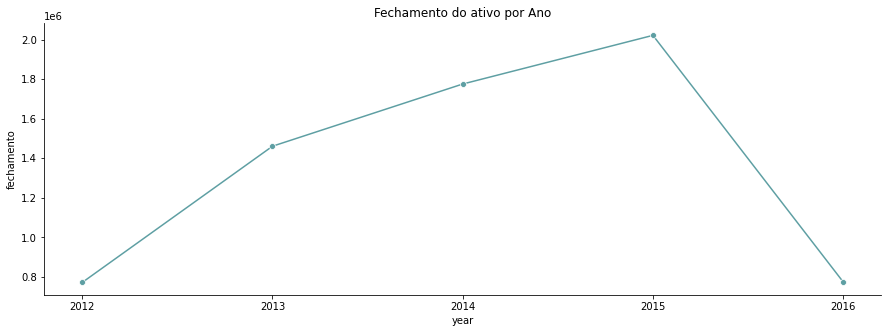

In [248]:
year = data[['fechamento', 'year']].groupby('year').sum().reset_index() # agrupando fechamento por ano
year['year'] = year['year'].astype('str') # passando o Ano para string

# plotando grafico
plt.figure(figsize=(15, 5))
sns.lineplot(x='year', y='fechamento', data=year, marker='o', color=palette[0])
plt.title('Fechamento do ativo por Ano')
sns.despine(right=True);

## 4.3 Análise Multivariada

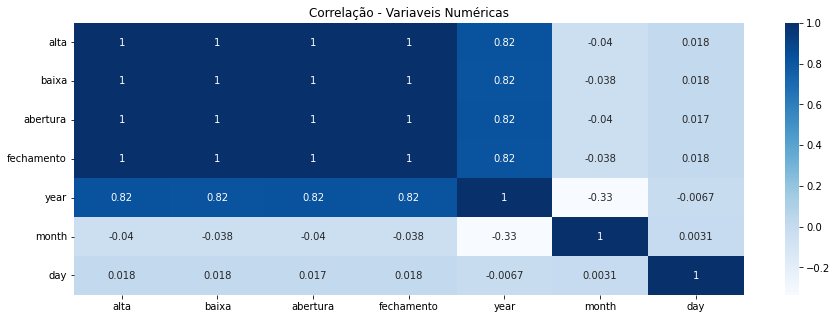

In [259]:
plt.figure(figsize=(15, 5))
sns.heatmap(data.corr(method='pearson'), annot=True, cmap='Blues')
plt.title('Correlação - Variaveis Numéricas');

**INSIGHT:** O ano possui correlação forte com as variaveis sobre os valores dos ativos. Aparentemente, mostrando que em determiandos anos os valores de abertura/fechamento são menores ou maiores.

# 5.0 REQUISITOS CASE

### 1. Construa um gráfico de linha com as séries das colunas [Baixa] e [Alta] (Eixo y), e [Data] (Eixo x).

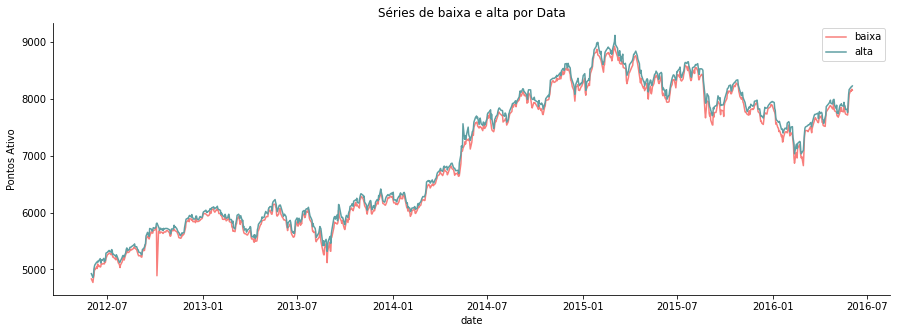

In [249]:
# plotando grafico 
plt.figure(figsize=(15, 5))
sns.lineplot(y='baixa', x='date', data=data, label='baixa', color=palette[3]) # serie de baixa
sns.lineplot(y='alta', x='date', data=data, label='alta', color=palette[0])   # serie de alta
plt.ylabel('Pontos Ativo')
plt.legend()
plt.title('Séries de baixa e alta por Data')
sns.despine(right=True);

### 2. Calcule os retornos diários do ativo.

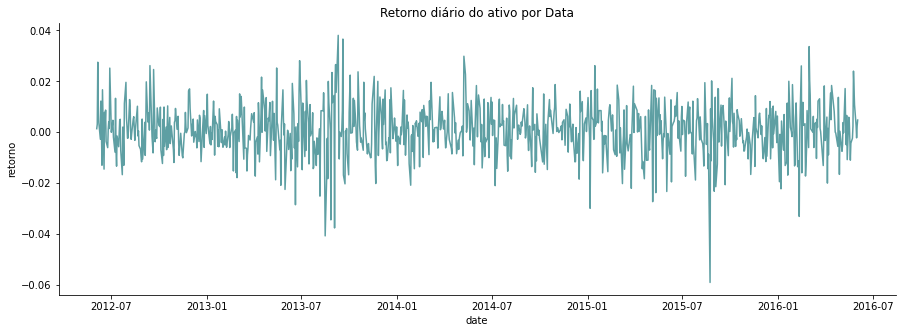

In [251]:
# usando o método pct_change para calcular o retorno diario dos ativos
return_days = data[['date', 'fechamento']].groupby('date').sum().sort_index().pct_change().reset_index().rename(
                                                                                columns={'fechamento': 'retorno'})

# plotando grafico de linha com os retornos
plt.figure(figsize=(15, 5))
sns.lineplot(x='date', y='retorno', data=return_days, color=palette[0])
plt.title('Retorno diário do ativo por Data')
sns.despine(right=True);

### 3. Construa um Histograma com os valores dos retornos diarios.

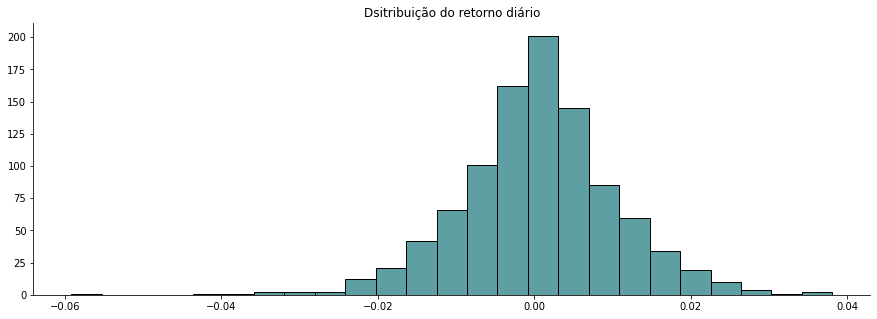

In [252]:
# plotando hitograma do retorno diario
return_days['retorno'].hist(figsize=(15, 5), grid=False, ec='k', bins=25, color=palette[0])
plt.title('Dsitribuição do retorno diário')
sns.despine(right=True);

### 4. Calcule a média do retorno diário.

In [173]:
# calculando a media do retorno diario
avg = return_days['retorno'].mean()

# mostrando a media do retorno
print('Retorno diário médio:', avg)

Retorno diário médio: 0.0005928854635416041


### 5. Calcule a mediana do retorno diário.

In [174]:
# calculando a mediana do retorno diario
median = return_days['retorno'].median()

# mostrando a mediana do retorno
print('Retorno diário mediano:', median)

Retorno diário mediano: 0.0005758695074986608


### 6. Indique o maior e o menor retorno diário.

In [176]:
min_return = return_days['retorno'].min() # menor valor
max_return = return_days['retorno'].max() # maior valor

# mostrando menor e maior valor
print('Menor retorno:', min_return)
print('Maior retorno:', max_return)

Menor retorno: -0.05915098088055637
Maior retorno: 0.03808712438836981


### 7. Calcule o desvio padrão (volatilidade) do retorno diário.

In [177]:
# usando o método std para calcular o devio padrão
std = return_days['retorno'].std()

# printando desvio padrão
print('Desvio padrão (volatilidade) do retorno:', std)

Desvio padrão (volatilidade) do retorno: 0.009939934527311409
